In [509]:
%matplotlib inline

In [510]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit

In [511]:
train_df = pd.read_csv('training_time.csv')
test_df = pd.read_csv('testing_time.csv')
test_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192
0,224.375,1.125,0.5,35.75,21.125,6.125000,32.250000,0.125,0.125000,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,21.0,21.0
1,0.000,0.000,0.0,0.00,0.000,0.000000,0.000000,0.000,2.166667,4.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,3.0
2,0.000,0.000,0.0,0.00,0.000,13.000000,48.000000,1.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.4,5.4,5.4
3,0.000,0.000,0.0,0.00,0.000,14.000000,56.625000,0.500,3.875000,5.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.7,8.7,6.7
4,0.000,0.000,0.0,0.00,0.000,0.000000,0.000000,0.000,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,1.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,0.000,0.000,0.0,0.00,0.000,0.166667,2.000000,0.000,4.500000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.8,13.8,11.3
10546,0.000,0.000,0.0,0.00,0.000,18.812500,78.562500,0.750,2.250000,2.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.1,17.1,16.6
10547,0.000,0.000,0.0,0.00,0.000,0.000000,0.000000,0.000,2.333333,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,6.0
10548,0.000,0.000,0.0,0.00,0.000,0.000000,0.000000,0.000,5.142857,8.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.9,2.9,2.4


In [512]:
train_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192
0,0.000,0.000,0.0,0.000000,0.000,7.083333,38.083333,0.000,1.583333,2.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.30,4.30,2.80
1,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000,2.500000,4.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.30,3.30,2.80
2,0.000,0.000,0.0,0.000000,0.000,16.666667,76.933333,0.800,2.333333,2.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.50,12.50,9.50
3,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000,5.000000,10.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.10,16.10,13.60
4,198.000,0.000,0.0,25.000000,20.000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.92,7.92,7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42190,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000,2.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.60,3.60,2.60
42191,0.000,0.000,0.0,0.100000,0.000,11.300000,39.300000,0.200,2.900000,4.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.10,2.10,2.10
42192,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000000,0.000,4.600000,9.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.80,17.80,14.30
42193,0.000,0.000,0.0,0.076923,0.000,0.153846,1.384615,0.000,3.230769,4.615385,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.00,12.00,10.50


In [513]:
data = pd.concat([train_df,test_df])
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192
0,0.0,0.0,0.0,0.0,0.0,7.083333,38.083333,0.00,1.583333,2.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.30,4.30,2.80
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.500000,4.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.30,3.30,2.80
2,0.0,0.0,0.0,0.0,0.0,16.666667,76.933333,0.80,2.333333,2.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.50,12.50,9.50
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.000000,10.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.10,16.10,13.60
4,198.0,0.0,0.0,25.0,20.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.92,7.92,7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,0.0,0.0,0.0,0.0,0.0,0.166667,2.000000,0.00,4.500000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.80,13.80,11.30
10546,0.0,0.0,0.0,0.0,0.0,18.812500,78.562500,0.75,2.250000,2.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.10,17.10,16.60
10547,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.333333,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.00,8.00,6.00
10548,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.142857,8.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.90,2.90,2.40


In [514]:
main = data.iloc[:,:189]
main

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189
0,0.0,0.0,0.0,0.0,0.0,7.083333,38.083333,0.00,1.583333,2.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.500000,4.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,16.666667,76.933333,0.80,2.333333,2.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.000000,10.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,198.0,0.0,0.0,25.0,20.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,0.0,0.0,0.0,0.0,0.0,0.166667,2.000000,0.00,4.500000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10546,0.0,0.0,0.0,0.0,0.0,18.812500,78.562500,0.75,2.250000,2.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10547,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.333333,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10548,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.142857,8.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [515]:
data_std= pd.concat([main,data['x190']],axis=1)
data_ppr = pd.concat([main,data['x191']],axis=1)
data_half = pd.concat([main,data['x192']],axis=1)
data_ppr

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x181,x182,x183,x184,x185,x186,x187,x188,x189,x191
0,0.0,0.0,0.0,0.0,0.0,7.083333,38.083333,0.00,1.583333,2.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.30
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.500000,4.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.30
2,0.0,0.0,0.0,0.0,0.0,16.666667,76.933333,0.80,2.333333,2.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.50
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.000000,10.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.10
4,198.0,0.0,0.0,25.0,20.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,0.0,0.0,0.0,0.0,0.0,0.166667,2.000000,0.00,4.500000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.80
10546,0.0,0.0,0.0,0.0,0.0,18.812500,78.562500,0.75,2.250000,2.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.10
10547,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,2.333333,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.00
10548,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,5.142857,8.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.90


# STD Values

In [516]:
X_train, X_test, y_train, y_test = train_test_split(data_std, data['x190'], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42196, 190) (42196,)
(10549, 190) (10549,)


In [517]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([ 3.1,  0.8,  9.2, ...,  0.6, 10.2,  2.1])

Text(0, 0.5, 'Predictions')

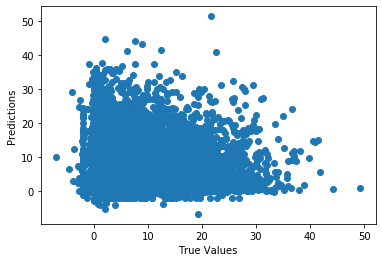

In [518]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [520]:
mod = smf.quantreg('Predicted ~ Y_Test',values)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              Predicted   Pseudo R-squared:            4.151e-05
Model:                       QuantReg   Bandwidth:                       1.430
Method:                 Least Squares   Sparsity:                        16.64
Date:                Fri, 11 Dec 2020   No. Observations:                10549
Time:                        18:58:58   Df Residuals:                    10547
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1024      0.113     36.334      0.000       3.881       4.324
Y_Test         0.0121      0.012      1.040      0.298      -0.011       0.035


In [521]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Y_Test']] + \
            res.conf_int().loc['Y_Test'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Predicted ~ Y_Test', values).fit()
ols_ci = ols.conf_int().loc['Y_Test'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Y_Test'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q          a             b        lb        ub
0  0.05   0.099999  7.619112e-07 -0.005995  0.005996
1  0.15   0.800005 -7.621240e-06 -0.006807  0.006791
2  0.25   1.384525  7.368928e-03 -0.001406  0.016144
3  0.35   2.205528  1.005015e-02 -0.002364  0.022464
4  0.45   3.364489  1.224503e-02 -0.006135  0.030625
5  0.55   5.090321  1.209757e-02 -0.015292  0.039487
6  0.65   7.289210  1.198905e-02 -0.019445  0.043423
7  0.75   9.895762  2.118647e-02 -0.013678  0.056051
8  0.85  13.642707  2.097095e-02 -0.021417  0.063359
9  0.95  20.683267  4.647997e-03 -0.057873  0.067169
{'a': 6.58010163379844, 'b': 0.009224860261129678, 'lb': -0.009515548105334243, 'ub': 0.0279652686275936}


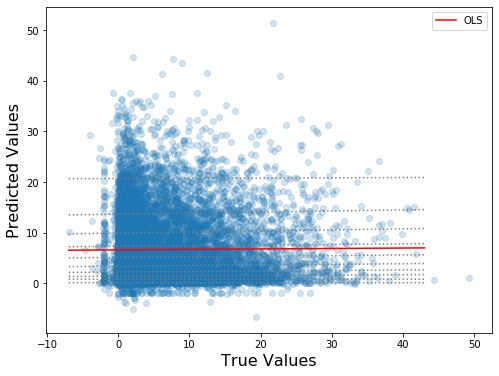

In [522]:
x = np.arange(values.Y_Test.min(), values.Y_Test.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(values.Y_Test, values.Predicted, alpha=.2)
legend = ax.legend()
ax.set_xlabel('True Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16);

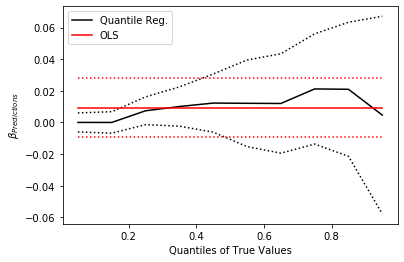

In [523]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{Predictions}$')
plt.xlabel('Quantiles of True Values')
plt.legend()
plt.show()

# PPR Values

In [524]:
X_train, X_test, y_train, y_test = train_test_split(data_ppr, data['x191'], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42196, 190) (42196,)
(10549, 190) (10549,)


In [525]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([ 5.9 ,  5.6 , 10.6 , ..., 14.16,  2.9 , 19.34])

Text(0, 0.5, 'Predictions')

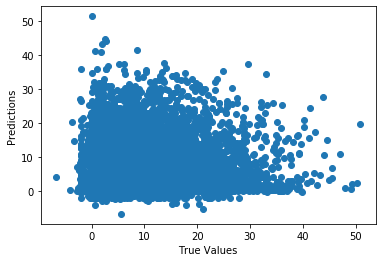

In [526]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [528]:
mod = smf.quantreg('Predicted ~ Y_Test',values)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              Predicted   Pseudo R-squared:           -7.770e-10
Model:                       QuantReg   Bandwidth:                       1.428
Method:                 Least Squares   Sparsity:                        16.72
Date:                Fri, 11 Dec 2020   No. Observations:                10549
Time:                        18:59:00   Df Residuals:                    10547
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2000      0.124     33.918      0.000       3.957       4.443
Y_Test       3.27e-07      0.010   3.17e-05      1.000      -0.020       0.020


In [529]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Y_Test']] + \
            res.conf_int().loc['Y_Test'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Predicted ~ Y_Test', values).fit()
ols_ci = ols.conf_int().loc['Y_Test'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Y_Test'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

/Users/skydaddy784/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      q          a             b        lb        ub
0  0.05   0.100000 -2.418867e-10 -0.005566  0.005566
1  0.15   0.800948 -3.164407e-03 -0.009178  0.002850
2  0.25   1.400005 -2.546141e-07 -0.007716  0.007716
3  0.35   2.299999  8.678954e-08 -0.011116  0.011116
4  0.45   3.452372  1.199681e-03 -0.015105  0.017505
5  0.55   5.199998  1.136876e-07 -0.024236  0.024237
6  0.65   7.288571  9.523909e-03 -0.017999  0.037046
7  0.75   9.787822  2.791870e-02 -0.002843  0.058680
8  0.85  13.465250  3.546048e-02 -0.002525  0.073446
9  0.95  20.357142  3.759399e-02 -0.017960  0.093148
{'a': 6.536040777667834, 'b': 0.011761946664425177, 'lb': -0.004774196739847775, 'ub': 0.02829809006869813}


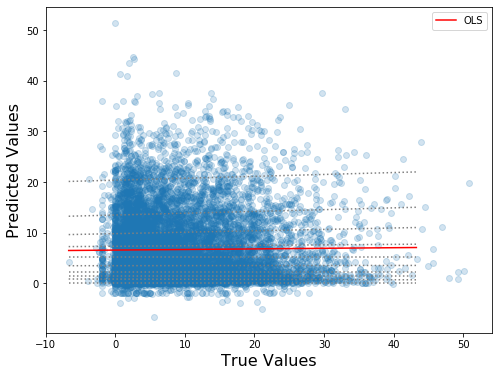

In [530]:
x = np.arange(values.Y_Test.min(), values.Y_Test.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(values.Y_Test, values.Predicted, alpha=.2)
legend = ax.legend()
ax.set_xlabel('True Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16);

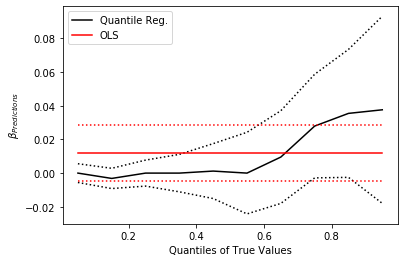

In [531]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{Predictions}$')
plt.xlabel('Quantiles of True Values')
plt.legend()
plt.show()

# Half PPR Values

In [532]:
X_train, X_test, y_train, y_test = train_test_split(data_half, data['x192'], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42196, 190) (42196,)
(10549, 190) (10549,)


In [533]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([1.00293931e-14, 1.80000000e+00, 4.10000000e+00, ...,
       3.50000000e+00, 1.00000000e+00, 2.31200000e+01])

Text(0, 0.5, 'Predictions')

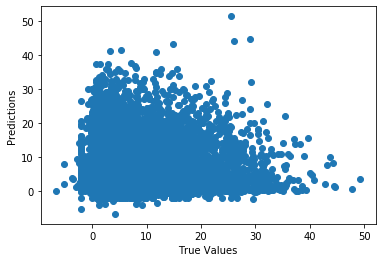

In [534]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [536]:
mod = smf.quantreg('Predicted ~ Y_Test',values)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              Predicted   Pseudo R-squared:            0.0001339
Model:                       QuantReg   Bandwidth:                       1.430
Method:                 Least Squares   Sparsity:                        16.70
Date:                Fri, 11 Dec 2020   No. Observations:                10549
Time:                        18:59:02   Df Residuals:                    10547
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3109      0.119     36.282      0.000       4.078       4.544
Y_Test        -0.0136      0.011     -1.229      0.219      -0.035       0.008


In [537]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Y_Test']] + \
            res.conf_int().loc['Y_Test'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Predicted ~ Y_Test', values).fit()
ols_ci = ols.conf_int().loc['Y_Test'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Y_Test'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q          a             b        lb        ub
0  0.05   0.100000  6.200353e-07 -0.005875  0.005876
1  0.15   0.800002 -3.048859e-03 -0.009660  0.003562
2  0.25   1.400003 -1.020306e-07 -0.008327  0.008326
3  0.35   2.333466 -6.561727e-03 -0.018423  0.005300
4  0.45   3.510065 -6.711325e-03 -0.024209  0.010786
5  0.55   5.346666 -2.222222e-02 -0.047929  0.003484
6  0.65   7.470564 -1.216622e-02 -0.041988  0.017656
7  0.75  10.134838 -1.290320e-02 -0.045753  0.019946
8  0.85  13.800067 -4.842094e-05 -0.039810  0.039713
9  0.95  20.936816 -3.184102e-02 -0.090202  0.026520
{'a': 6.725448488621349, 'b': -0.010632653561668539, 'lb': -0.028439804898257655, 'ub': 0.007174497774920579}


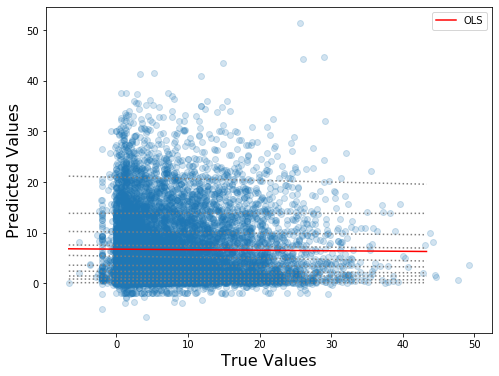

In [538]:
x = np.arange(values.Y_Test.min(), values.Y_Test.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(values.Y_Test, values.Predicted, alpha=.2)
legend = ax.legend()
ax.set_xlabel('True Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16);

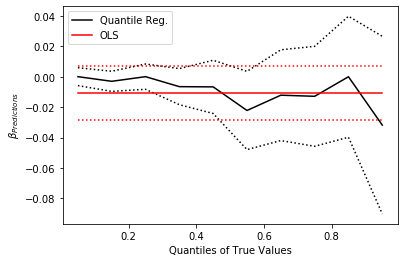

In [539]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{Predictions}$')
plt.xlabel('Quantiles of True Values')
plt.legend()
plt.show()